In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load dataset
df = pd.read_csv('loan_borowwer_data.csv')

In [4]:
# 2. Basic EDA
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Missing values per column:
 credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Data types:
 credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [6]:
# 3. Encode categorical variable ('purpose')
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])

In [8]:
# 4. Define features and target
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 6. Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree Results:
Accuracy: 0.7484342379958246
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1611
           1       0.22      0.24      0.23       305

    accuracy                           0.75      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.75      0.75      1916



In [12]:
# 7. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Results:
Accuracy: 0.8392484342379958
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.40      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.47      1916
weighted avg       0.77      0.84      0.77      1916



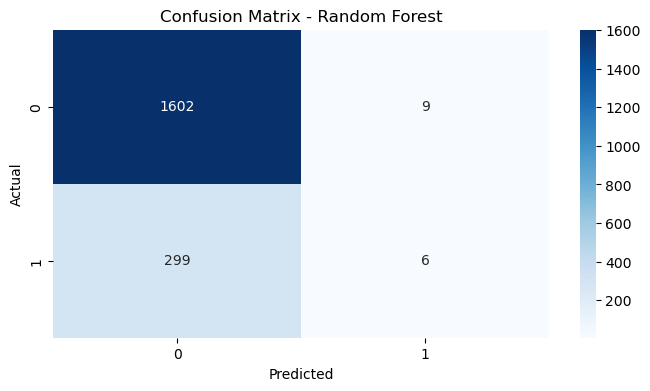

In [14]:
# Optional: Confusion matrix heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()